<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Experimenting" data-toc-modified-id="Experimenting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Experimenting</a></span></li><li><span><a href="#Main_draft" data-toc-modified-id="Main_draft-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Main_draft</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Visualizing-Data" data-toc-modified-id="Visualizing-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Visualizing Data</a></span></li><li><span><a href="#Data-Augmentation" data-toc-modified-id="Data-Augmentation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data Augmentation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Q" data-toc-modified-id="Q-2.3.0.1"><span class="toc-item-num">2.3.0.1&nbsp;&nbsp;</span>Q</a></span></li></ul></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Baseline Model</a></span><ul class="toc-item"><li><span><a href="#Q" data-toc-modified-id="Q-2.4.1.1"><span class="toc-item-num">2.4.1.1&nbsp;&nbsp;</span>Q</a></span></li><li><span><a href="#Del" data-toc-modified-id="Del-2.4.1.2"><span class="toc-item-num">2.4.1.2&nbsp;&nbsp;</span>Del</a></span></li></ul></li><li><span><a href="#Weighted-Model" data-toc-modified-id="Weighted-Model-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Weighted Model</a></span><ul class="toc-item"><li><span><a href="#Del" data-toc-modified-id="Del-2.4.2.1"><span class="toc-item-num">2.4.2.1&nbsp;&nbsp;</span>Del</a></span></li></ul></li><li><span><a href="#Other-models" data-toc-modified-id="Other-models-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Other models</a></span></li><li><span><a href="#Models-with-different-optimizers" data-toc-modified-id="Models-with-different-optimizers-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Models with different optimizers</a></span><ul class="toc-item"><li><span><a href="#Del" data-toc-modified-id="Del-2.4.4.1"><span class="toc-item-num">2.4.4.1&nbsp;&nbsp;</span>Del</a></span></li></ul></li></ul></li><li><span><a href="#Transfer-Learning" data-toc-modified-id="Transfer-Learning-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Transfer Learning</a></span></li><li><span><a href="#K-Fold-Cross-Validation" data-toc-modified-id="K-Fold-Cross-Validation-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>K-Fold Cross Validation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></div>

# Experimenting

In [3]:
from pathlib import Path # Loading in the data
import pandas as pd

In [4]:
data_dir = Path.cwd().parent / "Test_Data"

In [5]:
# Define path to the data directory
# data_dir = Path('../input/chest-xray-pneumonia/chest_xray/chest_xray')
data_dir = Path.cwd().parent / "Test_Data"

# Path to train directory (Fancy pathlib...no more os.path!!)
train_dir = data_dir / 'train'

# Path to validation directory
val_dir = data_dir / 'val'

# Path to test directory
test_dir = data_dir / 'test'

In [84]:
data_dir

WindowsPath('C:/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/Test_Data')

In [7]:
train_dir

WindowsPath('C:/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/Test_Data/train')

In [8]:
val_dir

WindowsPath('C:/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/Test_Data/val')

In [9]:
test_dir

WindowsPath('C:/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/Test_Data/test')

In [32]:
normal_cases_dir

WindowsPath('C:/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/Test_Data/train/NORMAL')

In [33]:
pneumonia_cases_dir

WindowsPath('C:/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/Test_Data/train/PNEUMONIA')

In [191]:
import glob
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir / 'NORMAL'
pneumonia_cases_dir = train_dir / 'PNEUMONIA'

# Get the list of all the images
# normal_cases = normal_cases_dir.glob('*.jpeg')
# pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

#########
normal_cases = train_dir.glob("*")
pneumonia_cases = pneumonia_cases_dir.glob('*')
#########

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))
    print('test1')

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    train_data.append((img, 1))
    print('test2')

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
# train_data = train_data.sample(frac=1.).reset_index(drop=True)

# Previewing the df
print('test3')
train_data.head()

test3


,image,label


In [ ]:
os.listdir()

In [122]:
normal_cases

<generator object Path.glob at 0x000002C3348384A0>

In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   0 non-null      object
 1   label   0 non-null      object
dtypes: object(2)
memory usage: 124.0+ bytes


In [ ]:
############################################################################

In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [13]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [22]:
data_dir = Path.cwd().parent / "Test_Data"
train_dir = data_dir / 'train'

In [25]:
train = get_training_data('../Data/train')


FileNotFoundError: [WinError 3] The system cannot find the path specified: '../Data/train\\PNEUMONIA'

In [27]:
train = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/train')
test = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/test')
val = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/val')

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../Test_Data/archive/chest_xray/chest_xray/chest_xray/train\\PNEUMONIA'

In [ ]:
############################################################################

In [43]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

In [85]:
# print(os.listdir("../input"))
# print(os.listdir())
mainDIR = os.listdir('/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray')

# sub_dir = main_dir / 'archive'
# print(os.listdir('../Test_Data'))

In [86]:
mainDIR

['.DS_Store', 'test', 'train', 'val']

In [ ]:
# mainDIR = os.listdir('../input/chest_xray/chest_xray')
# print(mainDIR)

In [87]:
train_folder = os.listdir('/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train')
val_folder = os.listdir('/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/val')
test_folder = os.listdir('/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/test')

In [132]:
train_folder

['.DS_Store', 'NORMAL', 'PNEUMONIA']

In [133]:
val_folder

['.DS_Store', 'NORMAL', 'PNEUMONIA']

In [79]:
# train_folder = '../input/chest_xray/chest_xray/train/'
# val_folder = '../input/chest_xray/chest_xray/val/'
# test_folder = '../input/chest_xray/chest_xray/test/'

In [100]:
train_folder

['.DS_Store', 'NORMAL', 'PNEUMONIA']

In [131]:
# # train 
# os.listdir(train_folder)
# train_n = train_folder+'NORMAL/'
# train_p = train_folder+'PNEUMONIA/'

In [101]:
train_n = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL'
train_p = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/PNEUMONIA'

In [172]:
train_n

'/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL'

In [118]:
testing_train_n = os.listdir('/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL')
testing_train_p = os.listdir('/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/PNEUMONIA')

In [119]:
testing_train_n

['.DS_Store',
 'IM-0115-0001.jpeg',
 'IM-0117-0001.jpeg',
 'IM-0119-0001.jpeg',
 'IM-0122-0001.jpeg',
 'IM-0125-0001.jpeg',
 'IM-0127-0001.jpeg',
 'IM-0128-0001.jpeg',
 'IM-0129-0001.jpeg',
 'IM-0131-0001.jpeg',
 'IM-0133-0001.jpeg',
 'IM-0135-0001.jpeg',
 'IM-0137-0001.jpeg',
 'IM-0140-0001.jpeg',
 'IM-0141-0001.jpeg',
 'IM-0143-0001.jpeg',
 'IM-0145-0001.jpeg',
 'IM-0147-0001.jpeg',
 'IM-0149-0001.jpeg',
 'IM-0151-0001.jpeg',
 'IM-0152-0001.jpeg',
 'IM-0154-0001.jpeg',
 'IM-0156-0001.jpeg',
 'IM-0158-0001.jpeg',
 'IM-0160-0001.jpeg',
 'IM-0162-0001.jpeg',
 'IM-0164-0001.jpeg',
 'IM-0166-0001.jpeg',
 'IM-0168-0001.jpeg',
 'IM-0170-0001.jpeg',
 'IM-0172-0001.jpeg',
 'IM-0176-0001.jpeg',
 'IM-0177-0001.jpeg',
 'IM-0178-0001.jpeg',
 'IM-0180-0001.jpeg',
 'IM-0182-0001.jpeg',
 'IM-0183-0001.jpeg',
 'IM-0185-0001.jpeg',
 'IM-0187-0001.jpeg',
 'IM-0189-0001.jpeg',
 'IM-0191-0001.jpeg',
 'IM-0193-0001.jpeg',
 'IM-0195-0001.jpeg',
 'IM-0199-0001.jpeg',
 'IM-0201-0001.jpeg',
 'IM-0203-0001.jpe

In [125]:
train_imgs_n = [file for file in testing_train_n if file.endswith('.jpeg')]

In [126]:
train_imgs_n

['IM-0115-0001.jpeg',
 'IM-0117-0001.jpeg',
 'IM-0119-0001.jpeg',
 'IM-0122-0001.jpeg',
 'IM-0125-0001.jpeg',
 'IM-0127-0001.jpeg',
 'IM-0128-0001.jpeg',
 'IM-0129-0001.jpeg',
 'IM-0131-0001.jpeg',
 'IM-0133-0001.jpeg',
 'IM-0135-0001.jpeg',
 'IM-0137-0001.jpeg',
 'IM-0140-0001.jpeg',
 'IM-0141-0001.jpeg',
 'IM-0143-0001.jpeg',
 'IM-0145-0001.jpeg',
 'IM-0147-0001.jpeg',
 'IM-0149-0001.jpeg',
 'IM-0151-0001.jpeg',
 'IM-0152-0001.jpeg',
 'IM-0154-0001.jpeg',
 'IM-0156-0001.jpeg',
 'IM-0158-0001.jpeg',
 'IM-0160-0001.jpeg',
 'IM-0162-0001.jpeg',
 'IM-0164-0001.jpeg',
 'IM-0166-0001.jpeg',
 'IM-0168-0001.jpeg',
 'IM-0170-0001.jpeg',
 'IM-0172-0001.jpeg',
 'IM-0176-0001.jpeg',
 'IM-0177-0001.jpeg',
 'IM-0178-0001.jpeg',
 'IM-0180-0001.jpeg',
 'IM-0182-0001.jpeg',
 'IM-0183-0001.jpeg',
 'IM-0185-0001.jpeg',
 'IM-0187-0001.jpeg',
 'IM-0189-0001.jpeg',
 'IM-0191-0001.jpeg',
 'IM-0193-0001.jpeg',
 'IM-0195-0001.jpeg',
 'IM-0199-0001.jpeg',
 'IM-0201-0001.jpeg',
 'IM-0203-0001.jpeg',
 'IM-0205-

In [154]:
df_testing = pd.DataFrame(train_imgs_n, columns=['test'])
df_testing

,test
0,IM-0115-0001.jpeg
1,IM-0117-0001.jpeg
2,IM-0119-0001.jpeg
3,IM-0122-0001.jpeg
4,IM-0125-0001.jpeg
...,...
1336,NORMAL2-IM-1406-0001.jpeg
1337,NORMAL2-IM-1412-0001.jpeg
1338,NORMAL2-IM-1419-0001.jpeg
1339,NORMAL2-IM-1422-0001.jpeg


In [169]:
df_testing = pd.DataFrame(train_imgs_n, columns=['img'])
df_testing

,img
0,IM-0115-0001.jpeg
1,IM-0117-0001.jpeg
2,IM-0119-0001.jpeg
3,IM-0122-0001.jpeg
4,IM-0125-0001.jpeg
...,...
1336,NORMAL2-IM-1406-0001.jpeg
1337,NORMAL2-IM-1412-0001.jpeg
1338,NORMAL2-IM-1419-0001.jpeg
1339,NORMAL2-IM-1422-0001.jpeg


In [170]:
df_testing['label'] = 0

In [171]:
df_testing

,img,label
0,IM-0115-0001.jpeg,0
1,IM-0117-0001.jpeg,0
2,IM-0119-0001.jpeg,0
3,IM-0122-0001.jpeg,0
4,IM-0125-0001.jpeg,0
...,...,...
1336,NORMAL2-IM-1406-0001.jpeg,0
1337,NORMAL2-IM-1412-0001.jpeg,0
1338,NORMAL2-IM-1419-0001.jpeg,0
1339,NORMAL2-IM-1422-0001.jpeg,0


In [ ]:
train_df = pd.concat()

In [ ]:
################################
# Visualizing

In [129]:
img = plt.imread(train_imgs_n[1])

FileNotFoundError: [Errno 2] No such file or directory: 'IM-0117-0001.jpeg'

TypeError: Image data of dtype <U17 cannot be converted to float

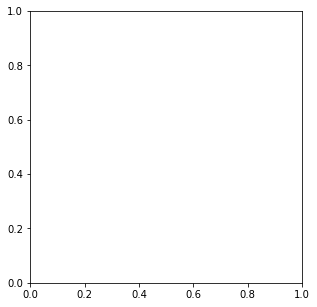

In [127]:
plt.figure(figsize = (5,5))
plt.imshow(train_imgs_n[1], cmap='gray')

In [140]:
test = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL/IM-0117-0001.jpeg'
plt.imread(test)

array([[11, 11, 15, ..., 17, 16, 15],
       [ 9, 10, 14, ..., 17, 15, 13],
       [ 8, 10, 14, ..., 18, 16, 15],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

TypeError: Image data of dtype <U154 cannot be converted to float

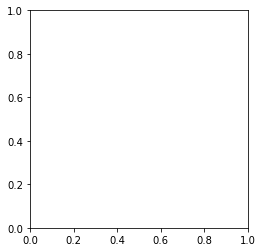

In [141]:
test = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL/IM-0117-0001.jpeg'
plt.imshow(test)

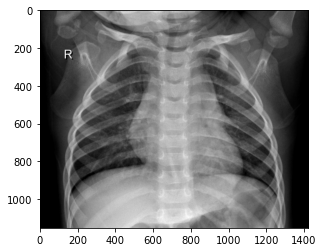

In [146]:
from PIL import Image
test = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL/IM-0117-0001.jpeg'
norm_load = Image.open(test)
plt.imshow(norm_load, cmap='gray');

In [ ]:
######################

In [220]:
train_imgs_n

['IM-0115-0001.jpeg',
 'IM-0117-0001.jpeg',
 'IM-0119-0001.jpeg',
 'IM-0122-0001.jpeg',
 'IM-0125-0001.jpeg',
 'IM-0127-0001.jpeg',
 'IM-0128-0001.jpeg',
 'IM-0129-0001.jpeg',
 'IM-0131-0001.jpeg',
 'IM-0133-0001.jpeg',
 'IM-0135-0001.jpeg',
 'IM-0137-0001.jpeg',
 'IM-0140-0001.jpeg',
 'IM-0141-0001.jpeg',
 'IM-0143-0001.jpeg',
 'IM-0145-0001.jpeg',
 'IM-0147-0001.jpeg',
 'IM-0149-0001.jpeg',
 'IM-0151-0001.jpeg',
 'IM-0152-0001.jpeg',
 'IM-0154-0001.jpeg',
 'IM-0156-0001.jpeg',
 'IM-0158-0001.jpeg',
 'IM-0160-0001.jpeg',
 'IM-0162-0001.jpeg',
 'IM-0164-0001.jpeg',
 'IM-0166-0001.jpeg',
 'IM-0168-0001.jpeg',
 'IM-0170-0001.jpeg',
 'IM-0172-0001.jpeg',
 'IM-0176-0001.jpeg',
 'IM-0177-0001.jpeg',
 'IM-0178-0001.jpeg',
 'IM-0180-0001.jpeg',
 'IM-0182-0001.jpeg',
 'IM-0183-0001.jpeg',
 'IM-0185-0001.jpeg',
 'IM-0187-0001.jpeg',
 'IM-0189-0001.jpeg',
 'IM-0191-0001.jpeg',
 'IM-0193-0001.jpeg',
 'IM-0195-0001.jpeg',
 'IM-0199-0001.jpeg',
 'IM-0201-0001.jpeg',
 'IM-0203-0001.jpeg',
 'IM-0205-

In [216]:
test = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL/'

In [218]:
test2 = test + 'IM-0117-0001.jpeg'
test2

'/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL/IM-0117-0001.jpeg'

In [224]:
test_list = []
for img in train_imgs_n:
    test_list.append(test + img)

In [225]:
test_list

['/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL/IM-0115-0001.jpeg',
 '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL/IM-0117-0001.jpeg',
 '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL/IM-0119-0001.jpeg',
 '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL/IM-0122-0001.jpeg',
 '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL/IM-0125-0001.jpeg',
 '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL/IM-0127-0001.jpeg',
 '/Users/aiden.local/Documents/Flatiron/Course

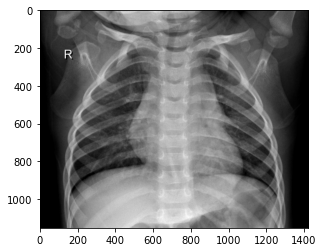

In [230]:
norm_load = Image.open(test_list[1])
plt.imshow(norm_load, cmap='gray');

In [231]:
test_test_list = test_list[:10]

test
test
test
test
test
test
test
test
test
test


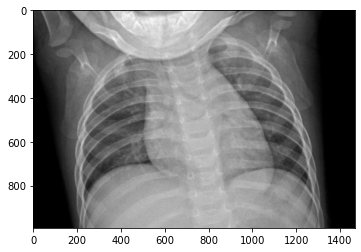

In [233]:
for img in test_test_list:
    print('test')
    norm_load = Image.open(img)
    plt.imshow(norm_load, cmap='gray');

In [ ]:
############################################################################

In [130]:
# plt.figure(figsize = (5,5))
# plt.imshow(train[0][0], cmap='gray')
# plt.title(labels[train[0][1]])

# plt.figure(figsize = (5,5))
# plt.imshow(train[-1][0], cmap='gray')
# plt.title(labels[train[-1][1]])

In [117]:
train_n

'/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL'

In [104]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

1342
normal picture title:  IM-0115-0001.jpeg
pneumonia picture title: person1008_bacteria_2939.jpeg


FileNotFoundError: [Errno 2] No such file or directory: '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMALIM-0115-0001.jpeg'

In [ ]:
#############

In [ ]:
test_train_n

In [ ]:
# Get few samples for both the classes
pneumonia_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list
samples = pneumonia_samples + normal_samples
del pneumonia_samples, normal_samples

# Plot the data 
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Pneumonia")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

In [116]:
# from skimage.io import imread
# img = imread(test_train_n[1])
# ax[i//5, i%5].imshow(img, cmap='gray')

from skimage.io import imread
img = imread(test_train_n[1])
img.imshow(img, cmap='gray')

FileNotFoundError: No such file: 'C:\Users\aiden.local\Documents\Flatiron\Course-Material\phase_4\project_phase_4\draft\IM-0115-0001.jpeg'

In [ ]:
########################

In [196]:
import os
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.models import Model, load_model
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
np.random.seed(22)

In [202]:
# Do not forget to include the last slash
def load_normal(norm_path):
    norm_files = np.array(os.listdir(norm_path))
#     norm_labels = np.array(['normal']*len(norm_files))
    
    norm_images = []
    for image in tqdm(norm_files):
        image = cv2.imread(norm_path + image)
        image = cv2.resize(image, dsize=(200,200))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        norm_images.append(image)
        
    norm_images = np.array(norm_images)
    
    return norm_images, norm_labels

def load_pneumonia(pneu_path):
    pneu_files = np.array(os.listdir(pneu_path))
#     pneu_labels = np.array([pneu_file.split('_')[1] for pneu_file in pneu_files])
    
    pneu_images = []
    for image in tqdm(pneu_files):
        image = cv2.imread(pneu_path + image)
        image = cv2.resize(image, dsize=(200,200))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        pneu_images.append(image)
        
    pneu_images = np.array(pneu_images)
    
    return pneu_images, pneu_labels

In [200]:
# norm_images, norm_labels = load_normal('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/')
# pneu_images, pneu_labels = load_pneumonia('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/')

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/'

In [203]:
train_n
norm_images = load_normal(train_n)
# pneu_images, pneu_labels = load_pneumonia('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/')

  0%|          | 0/1342 [00:00<?, ?it/s]


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [211]:
#################

In [213]:
import os
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.models import Model, load_model
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
np.random.seed(22)

In [212]:
# Do not forget to include the last slash
def load_normal(norm_path):
    norm_files = np.array(os.listdir(norm_path))
    norm_labels = np.array(['normal']*len(norm_files))
    
    norm_images = []
    for image in tqdm(norm_files):
        image = cv2.imread(norm_path + image)
        image = cv2.resize(image, dsize=(200,200))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        norm_images.append(image)
        
    norm_images = np.array(norm_images)
    
    return norm_images, norm_labels

def load_pneumonia(pneu_path):
    pneu_files = np.array(os.listdir(pneu_path))
    pneu_labels = np.array([pneu_file.split('_')[1] for pneu_file in pneu_files])
    
    pneu_images = []
    for image in tqdm(pneu_files):
        image = cv2.imread(pneu_path + image)
        image = cv2.resize(image, dsize=(200,200))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        pneu_images.append(image)
        
    pneu_images = np.array(pneu_images)
    
    return pneu_images, pneu_labels

In [214]:
norm_images = load_normal(train_n)

  0%|          | 0/1342 [00:00<?, ?it/s]


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
#######################################################
# Model

In [234]:
# let's build the CNN model

cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [235]:
num_of_test_samples = 600
batch_size = 32

In [237]:
train_path = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/'
val_path = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/val/'
test_path = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/test/'

In [ ]:
# #  Fitting the CNN to the images
# # The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

# training_set = train_datagen.flow_from_directory('../input/chest_xray/chest_xray/train',
#                                                  target_size = (64, 64),
#                                                  batch_size = 32,
#                                                  class_mode = 'binary')

# validation_generator = test_datagen.flow_from_directory('../input/chest_xray/chest_xray/val/',
#     target_size=(64, 64),
#     batch_size=32,
#     class_mode='binary')

# test_set = test_datagen.flow_from_directory('../input/chest_xray/chest_xray/test',
#                                             target_size = (64, 64),
#                                             batch_size = 32,
#                                             class_mode = 'binary')

In [238]:
#  Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(val_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [1]:
cnn.summary()

NameError: name 'cnn' is not defined

In [240]:
cnn_model = cnn.fit_generator(training_set,
                         steps_per_epoch = 163,
                         epochs = 1,
                         validation_data = validation_generator,
                         validation_steps = 624)

Instructions for updating:
Please use Model.fit, which supports generators.
163/163 [==============================] - 177s 1s/step - loss: 0.3837 - accuracy: 0.8322 - val_loss: 0.3494 - val_accuracy: 0.7500


In [241]:
test_accu = cnn.evaluate_generator(test_set,steps=624)

Instructions for updating:
Please use Model.evaluate, which supports generators.


In [242]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 86.21794581413269 %


In [ ]:
import os
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.models import Model, load_model
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
np.random.seed(22)

In [ ]:
##########################################################################################################

# Main_draft

## Imports

In [7]:
# Imports
# visualization 
from PIL import Image
import os
import matplotlib.pyplot as plt

# Model
from keras.models import Sequential
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator

## Visualizing Data

**Note:** If you are running this code yourself you will need to download the data from [kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia) and change all of the paths to your local download path

In [8]:
# Create a list containing the names of the files in the directory
temp_train_n = os.listdir('/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL')
temp_train_p = os.listdir('/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/PNEUMONIA')

# Select only images from temp_train_n
train_imgs_n = [file for file in temp_train_n if file.endswith('.jpeg')]
train_imgs_p = [file for file in temp_train_p if file.endswith('.jpeg')]

In [9]:
# Path of training NORMAL and PNEUMONIA cases
path_train_n = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL/'
path_train_p = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/PNEUMONIA/'

In [10]:
# Loop through and create a path to each individual NORMAL image
list_train_n = []
for img in train_imgs_n:
    list_train_n.append(path_train_n + img)

# Loop through and create a path to each individual PNEUMONIA image
list_train_p = []
for img in train_imgs_p:
    list_train_p.append(path_train_p + img)

In [7]:
# number of imgs in train NORMAL
len(list_train_n)

1341

In [8]:
# number of imgs in train PNEUMONIA
len(list_train_p)

3875

Our dataset is highly unbalanced. We will be using label weights with our model. But there are other strategies like downsampling or upsampling the data. You can read more about these techniques [here](https://towardsdatascience.com/how-to-deal-with-imbalanced-data-in-python-f9b71aba53eb) (Medium members only link, you get access to 3 free posts a month)

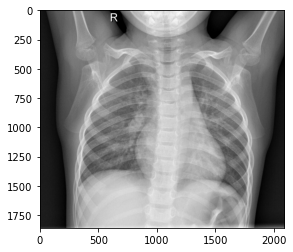

In [9]:
# Visualize the first NORMAL case
norm_load = Image.open(list_train_n[0])
plt.imshow(norm_load, cmap='gray');

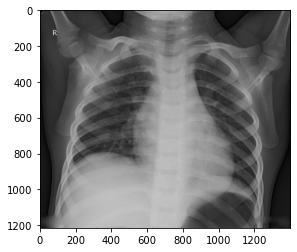

In [10]:
# Visualize the last NORMAL case
norm_load = Image.open(list_train_n[-1])
plt.imshow(norm_load, cmap='gray');

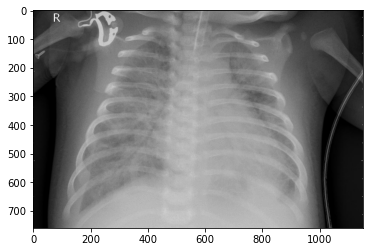

In [11]:
# Visualize the first PNEUMONIA case
norm_load = Image.open(list_train_p[0])
plt.imshow(norm_load, cmap='gray');

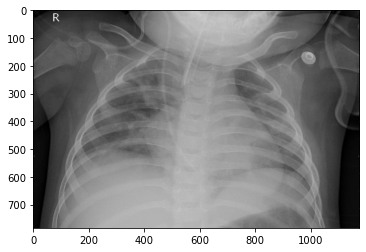

In [12]:
# Visualize the last PNEUMONIA case
norm_load = Image.open(list_train_p[-1])
plt.imshow(norm_load, cmap='gray');

Looking at the differences between the normal and pneumonia cases, the pneumonia cases seems to be "foggier" but if I was shown the imgs without knowing their labels it would be hard for me to guess for each img in the list. Let's see if our model can do better than me (not a doctor)

## Data Augmentation 

The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small. Here, you will standardize values to be in the [0, 1] range by using ImageDataGenerator(rescale = 1./255)

The function [ImageDataGenerator](https://studymachinelearning.com/keras-imagedatagenerator-with-flow_from_directory/) class allows the users to perform image augmentation while training the model
 
For more info on Data Augmentation visit the above link or this [tutorial](https://www.tensorflow.org/tutorials/images/data_augmentation) from TensorFlow

In [11]:
# Setting paths
train_path = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/'
val_path = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/val/'
test_path = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/test/'

#### Q
is rescale setting image dimensions or rgb range

In [12]:
# Data augmentation

# Train augmentation
train_generator = ImageDataGenerator(rescale = 1./255, # rgb range to [0,1]
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True)

# Apply train_generator to train data
training_set = train_generator.flow_from_directory(train_path,
                                                   target_size = (64, 64),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

# Test and val augmentation
# Scale normalization rgb [0, 255] range to [0,1]
test_generator = ImageDataGenerator(rescale = 1./255)  

# Apply test_generator to test data
test_set = test_generator.flow_from_directory(test_path,
                                              target_size = (64, 64),
                                              batch_size = 32,
                                              class_mode = 'binary')
# Uses same generator as test
# Apply test_generator to val data
validation_set = test_generator.flow_from_directory(val_path,
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
###############

In [ ]:
#  Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(val_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

In [ ]:
# Data augmentation
from sklearn.model_selection import train_test_split

# Train augmentation
train_generator = ImageDataGenerator(rescale = 1./255, # rgb range to [0,1]
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True)

# Apply train_generator to train data
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Test and val augmentation
# Scale normalization rgb [0, 255] range to [0,1]
test_generator = ImageDataGenerator(rescale = 1./255)  

# Apply test_generator to test data
test_set = test_generator.flow_from_directory(test_path,
                                              target_size = (64, 64),
                                              batch_size = 32,
                                              class_mode = 'binary')
# Uses same generator as test
# validation_set = X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.33, random_state=42)

In [ ]:
####################
# del

**Note** There are only a few images in the validation set. This really should be higher but I took this data off of Kaggle and am not going to adjust it for the sake of time

You can visit this [link](https://data.mendeley.com/datasets/rscbjbr9sj/3) for a larger scale of this same dataset

In [ ]:
# get unique values and counts
ar_unique, i = np.unique(train_set.classes, return_counts=True)
# display the returned array
print("Unique values:", ar_unique)
# display the counts
print("Counts:", i)

In [ ]:
3875/1341

## Modeling

### Baseline Model

Our baseline model is a relatively simple CNN that I will be using to judge model performance against more complex models

In [24]:
# Initialize model
model_baseline = Sequential()

# First hidden layer
model_baseline.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

# Second hidden layer
model_baseline.add(Conv2D(32, (3, 3), activation="relu"))

# Flatten
model_baseline.add(Flatten())

# Output layer
model_baseline.add(Dense(1, activation = 'sigmoid'))

# Compile the model
model_baseline.compile(optimizer = 'adam',
                       loss = 'binary_crossentropy',
                       metrics = ['accuracy'])

In [25]:
history1 = model_baseline.fit(training_set, 
                              steps_per_epoch = 163,
                              epochs = 25,
                              validation_data = validation_set,
                              validation_steps = 624)

Epoch 1/25
163/163 [==============================] - 106s 653ms/step - loss: 0.3675 - accuracy: 0.8432 - val_loss: 0.3767 - val_accuracy: 0.8750
Epoch 2/25
163/163 [==============================] - 106s 647ms/step - loss: 0.2376 - accuracy: 0.9022
Epoch 3/25
163/163 [==============================] - 106s 649ms/step - loss: 0.2062 - accuracy: 0.9193
Epoch 4/25
163/163 [==============================] - 103s 632ms/step - loss: 0.1888 - accuracy: 0.9233
Epoch 5/25
163/163 [==============================] - 103s 631ms/step - loss: 0.1727 - accuracy: 0.9312
Epoch 6/25
163/163 [==============================] - 102s 627ms/step - loss: 0.1664 - accuracy: 0.9379
Epoch 7/25
163/163 [==============================] - 104s 638ms/step - loss: 0.1662 - accuracy: 0.9317
Epoch 8/25
163/163 [==============================] - 103s 635ms/step - loss: 0.1669 - accuracy: 0.9381
Epoch 9/25
163/163 [==============================] - 108s 664ms/step - loss: 0.1402 - accuracy: 0.9477
Epoch 10/25
163/163 [=

#### Q
val set is very small. Can I use test set

#### Del

In [26]:
test_acc_baseline = model_baseline.evaluate(test_set, steps=624)

 20/624 [..............................] - 10s 522ms/step - loss: 0.2989 - accuracy: 0.8974


### Weighted Model

Our model architecture is actually the same as our baseline model we just impose weights to the labels as our data is highly unbalanced. This actually reduces our training accuracy but increases our validation accuracy. Some form of balancing for your data is extremely important with this level of unbalanced data

In [27]:
# Initialize model
model_weighted = Sequential()

# First hidden layer
model_weighted.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

# Second hidden layer
model_weighted.add(Conv2D(32, (3, 3), activation="relu"))

# Flatten
model_weighted.add(Flatten())

# Output layer
model_weighted.add(Dense(1, activation = 'sigmoid'))

# Compile the model
model_weighted.compile(optimizer = 'adam',
                       loss = 'binary_crossentropy',
                       metrics = ['accuracy'])

In [28]:
history2 = model_weighted.fit(training_set, 
                   steps_per_epoch = 163,
                   epochs = 2,
                   validation_data = validation_set,
                   validation_steps = 624,
                   class_weight={0:2.8 , 1:1}) # <--------------------------

Epoch 1/2
163/163 [==============================] - 105s 642ms/step - loss: 0.6197 - accuracy: 0.8035 - val_loss: 0.3713 - val_accuracy: 0.9375
Epoch 2/2
163/163 [==============================] - 107s 657ms/step - loss: 0.4588 - accuracy: 0.8654


In [ ]:
#############

In [ ]:
model_weighted.fit_generator(training_set, 
                   steps_per_epoch = 163,
                   epochs = 2,
                   validation_data = validation_generator,
                   class_weight={0:2.8 , 1:1}) # <--------------------------

In [ ]:
model_weighted.fit_generator(training_set, 
                             steps_per_epoch = 163,
                             epochs = 3,
                             validation_data = validation_generator,
                             validation_steps = 624,
                             class_weight={0:2.8 , 1:1}) # <--------------------------

In [ ]:
model_weighted.fit_generator(training_set, 
                   steps_per_epoch = 163,
                   epochs = 2,
                   validation_data = validation_set,
                   class_weight={0:2.8 , 1:1}) # <--------------------------

In [ ]:
model_weighted.fit_generator(training_set, 
                             steps_per_epoch = 163,
                             epochs = 5,
                             validation_data = validation_set,
                             class_weight={0:2.8 , 1:1}) # <--------------------------

In [ ]:
model_weighted.fit_generator(training_set, 
                             steps_per_epoch = 163,
                             epochs = 25,
                             validation_data = validation_set,
                             class_weight={0:2.8 , 1:1}) # <----------------

In [ ]:
# Initialize model
test_model_weighted = Sequential()

# First hidden layer
test_model_weighted.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

# Second hidden layer
test_model_weighted.add(Conv2D(32, (3, 3), activation="relu"))

# Flatten
test_model_weighted.add(Flatten())

# Output layer
test_model_weighted.add(Dense(1, activation = 'sigmoid'))

# Compile the model
test_model_weighted.compile(optimizer = 'adam',
                       loss = 'binary_crossentropy',
                       metrics = ['accuracy'])

In [ ]:
test_model_weighted.fit(training_set, 
                             steps_per_epoch = 163,
                             epochs = 10,
                             validation_data = validation_set,
                             class_weight={0:2.8 , 1:1}) # <--------------------------

In [ ]:
test_model_weighted.history.__dict__

In [ ]:
history = test_model_weighted.fit(training_set, 
                             steps_per_epoch = 163,
                             epochs = 25,
                             validation_data = validation_set,
                             class_weight={0:2.8 , 1:1}) # <-----------------

In [ ]:
history.__dict__

In [ ]:
history.history['loss']

In [ ]:
model_weighted.history.__dict__

In [ ]:
test_model_weighted.history['loss']

In [ ]:
test_model_weighted.history['accuracy'][1]

In [ ]:
test_model_weighted.history['acc']

In [ ]:
# Accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [ ]:
# Loss 

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [ ]:
# model_weighted.fit(training_set, 
#                    steps_per_epoch = 163,
#                    epochs = 25,
#                    validation_data = validation_set,
#                    class_weight={0:2.8 , 1:1}) # <--------------------------

In [ ]:
# model_weighted.evaluate()
test_accu = model_weighted.evaluate_generator(test_set, steps=624)
print('The testing accuracy is :', test_accu[1]*100, '%')

In [ ]:
################

#### Del

In [ ]:
# Should not test every model against test_set as this causes data leakage
# Only the model you believe to be highest performing
test_acc_baseline = model_weighted.evaluate(test_set, steps=624)

### Other models

In [ ]:
# dropout, l2
# more layers
# bigger layers

### Models with different optimizers

Adam is currently one of the most popular and powerful optimizers. Here we will quickly try a few others with the same architecture as our previous models.

For more details on these optimizers check out the [documentation](https://keras.io/api/optimizers/)

In [29]:
# let's build the CNN model

cnn = Sequential()

# Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

# Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', 
            loss = 'binary_crossentropy', 
            metrics = ['accuracy'])

In [30]:
cnn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [31]:
history3 = cnn.fit(training_set, 
                    steps_per_epoch = 163,
                    epochs = 25,
                    validation_data = validation_generator,
                    validation_steps = 624)

NameError: name 'validation_generator' is not defined

#### Del

In [ ]:
test_acc = cnn.evaluate(test_set, steps=624)

In [ ]:
print('The testing accuracy is :', test_acc[1]*100, '%')

## Transfer Learning

In [16]:
from keras.applications import VGG19
cnn_base = VGG19(weights='imagenet', 
                 include_top=False, 
                 input_shape=(64, 64, 3))

In [ ]:
cnn_base.summary()

In [18]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=2*2*512))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(training_set, 
                    steps_per_epoch = 163,
                             epochs = 50,
                             validation_data = validation_set,
                             class_weight={0:2.8 , 1:1})

Epoch 1/50


ValueError: in user code:

    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\losses.py:1605 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\backend.py:4823 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\ops\nn_impl.py:173 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, None, None, 1) vs (None, 1))


In [ ]:
# Accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [ ]:
# Loss 

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [ ]:
##########################

In [19]:
from keras.applications import Xception
cnn_base = Xception(weights='imagenet', 
                    include_top=False)

In [20]:
cnn_base.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [23]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
#               loss='binary_crossentropy',
#               metrics=['acc'])

model.compile(optimizer = 'adam',
                       loss = 'binary_crossentropy',
                       metrics = ['accuracy'])

history = model.fit(training_set, 
                             steps_per_epoch = 163,
                             epochs = 50,
                             validation_data = validation_set,
                             class_weight={0:2.8 , 1:1})

Epoch 1/50


ValueError: in user code:

    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\losses.py:1605 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\backend.py:4823 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\ops\nn_impl.py:173 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, None, None, 1) vs (None, 1))


In [ ]:
# Accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [ ]:
# Loss 

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [ ]:
############################################################################

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
transfer_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [4]:
transfer_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [5]:
transfer_model.trainable = False

In [14]:
inputs = keras.Input(shape=(150, 150, 3))
#  transfer_model is running in inference mode by passing `training=False`. 
x = transfer_model(inputs, training=False)
# Convert features of shape `transfer_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [16]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

In [23]:
history2 = model.fit(
    training_set, 
    steps_per_epoch = 163,
    epochs = 2,
    validation_data = validation_set,
    class_weight={0:2.8 , 1:1}) # <--------------------------

Epoch 1/2
163/163 [==============================] - 119s 730ms/step - loss: 0.8711 - accuracy: 0.8303 - val_loss: 0.3787 - val_accuracy: 0.8750
Epoch 2/2
163/163 [==============================] - 120s 734ms/step - loss: 0.9813 - accuracy: 0.8459 - val_loss: 2.0462 - val_accuracy: 0.8750


In [27]:
history3 = model.fit(
    training_set, 
    steps_per_epoch = 163,
    epochs = 5,
    validation_data = validation_set,
    class_weight={0:2.8 , 1:1}) # <--------------------------

Epoch 1/5
163/163 [==============================] - 112s 690ms/step - loss: 0.6974 - accuracy: 0.8608 - val_loss: 1.2842 - val_accuracy: 0.8750
Epoch 2/5
163/163 [==============================] - 112s 684ms/step - loss: 0.6523 - accuracy: 0.8691 - val_loss: 2.1019 - val_accuracy: 0.8750
Epoch 3/5
163/163 [==============================] - 112s 687ms/step - loss: 0.7158 - accuracy: 0.8681 - val_loss: 2.1862 - val_accuracy: 0.7500
Epoch 4/5
163/163 [==============================] - 113s 693ms/step - loss: 0.7030 - accuracy: 0.8679 - val_loss: 1.4555 - val_accuracy: 0.8125
Epoch 5/5
163/163 [==============================] - 113s 693ms/step - loss: 0.8437 - accuracy: 0.8539 - val_loss: 2.1147 - val_accuracy: 0.7500


In [24]:
history2.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.functional.Functional at 0x1234f0f21f0>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.8710840344429016, 0.9812817573547363],
  'accuracy': [0.8303297758102417, 0.8458588719367981],
  'val_loss': [0.3787214756011963, 2.0462069511413574],
  'val_accuracy': [0.875, 0.875]},
 'params': {'verbose': 1, 'epochs': 2, 'steps': 163},
 'epoch': [0, 1]}

In [28]:
history3.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.functional.Functional at 0x1234f0f21f0>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.6973974108695984,
   0.6522963643074036,
   0.7157790064811707,
   0.7030242085456848,
   0.8436838388442993],
  'accuracy': [0.8608129024505615,
   0.869056761264801,
   0.8680981397628784,
   0.8679064512252808,
   0.8539110422134399],
  'val_loss': [1.284190058708191,
   2.1018786430358887,
   2.1861910820007324,
   1.4555364847183228,
   2.1147353649139404],
  'val_accuracy': [0.875, 0.875, 0.75, 0.8125, 0.75]},
 'params': {'verbose': 1, 'epochs': 5, 'steps': 163},
 'epoch': [0, 1, 2, 3, 4]}

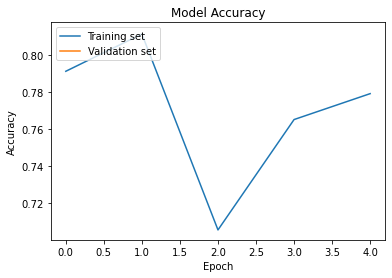

In [19]:
# Accuracy 
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [ ]:
############################################################################

In [29]:
transfer_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

58892288/58889256 [==============================] - 1s 0us/step


In [30]:
transfer_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [31]:
transfer_model.trainable = False

In [32]:
inputs = keras.Input(shape=(150, 150, 3))
#  transfer_model is running in inference mode by passing `training=False`. 
x = transfer_model(inputs, training=False)
# Convert features of shape `transfer_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [33]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

In [34]:
history3 = model.fit(
    training_set, 
    steps_per_epoch = 163,
    epochs = 5,
    validation_data = validation_set,
    class_weight={0:2.8 , 1:1}) # <--------------------------

Epoch 1/5
163/163 [==============================] - 137s 838ms/step - loss: 3.1159 - accuracy: 0.6158 - val_loss: 0.3872 - val_accuracy: 0.8750
Epoch 2/5
163/163 [==============================] - 128s 788ms/step - loss: 0.5631 - accuracy: 0.8353 - val_loss: 0.2978 - val_accuracy: 0.9375
Epoch 3/5
163/163 [==============================] - 131s 804ms/step - loss: 0.9878 - accuracy: 0.8554 - val_loss: 0.5527 - val_accuracy: 0.6250
Epoch 4/5
163/163 [==============================] - 133s 818ms/step - loss: 0.6356 - accuracy: 0.8520 - val_loss: 0.2437 - val_accuracy: 1.0000
Epoch 5/5
163/163 [==============================] - 133s 818ms/step - loss: 0.4840 - accuracy: 0.8740 - val_loss: 0.2437 - val_accuracy: 0.9375


In [35]:
history3.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.functional.Functional at 0x123534b0520>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [3.115935802459717,
   0.5630557537078857,
   0.9878109693527222,
   0.6356082558631897,
   0.48398566246032715],
  'accuracy': [0.6157975196838379,
   0.8353143930435181,
   0.8554447889328003,
   0.8519938588142395,
   0.8740414381027222],
  'val_loss': [0.3872497081756592,
   0.29781514406204224,
   0.5527029633522034,
   0.24374261498451233,
   0.24370062351226807],
  'val_accuracy': [0.875, 0.9375, 0.625, 1.0, 0.9375]},
 'params': {'verbose': 1, 'epochs': 5, 'steps': 163},
 'epoch': [0, 1, 2, 3, 4]}

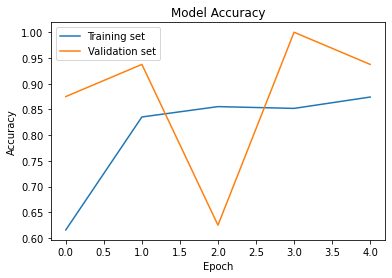

In [36]:
# Accuracy 
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [37]:
history4 = model.fit(
    training_set, 
    steps_per_epoch = 163,
    epochs = 25,
    validation_data = validation_set,
    class_weight={0:2.8 , 1:1}) # <--------------------------

Epoch 1/25
163/163 [==============================] - 130s 795ms/step - loss: 0.4580 - accuracy: 0.8792 - val_loss: 0.2320 - val_accuracy: 0.9375
Epoch 2/25
163/163 [==============================] - 127s 780ms/step - loss: 0.4532 - accuracy: 0.8746 - val_loss: 0.2289 - val_accuracy: 0.9375
Epoch 3/25
163/163 [==============================] - 127s 782ms/step - loss: 0.4422 - accuracy: 0.8771 - val_loss: 0.2235 - val_accuracy: 0.8750
Epoch 4/25
163/163 [==============================] - 127s 781ms/step - loss: 3.9790 - accuracy: 0.8230 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 5/25
163/163 [==============================] - 128s 785ms/step - loss: 10.7488 - accuracy: 0.7429 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 6/25
163/163 [==============================] - 127s 781ms/step - loss: 7.2874 - accuracy: 0.7717 - val_loss: 0.2699 - val_accuracy: 0.9375
Epoch 7/25
163/163 [==============================] - 128s 783ms/step - loss: 0.6432 - accuracy: 0.8692 - val_loss: 0.2865 

In [38]:
history4.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.functional.Functional at 0x123534b0520>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.45801037549972534,
   0.4532189965248108,
   0.44220593571662903,
   3.9789929389953613,
   10.74880313873291,
   7.287420749664307,
   0.6431954503059387,
   5.764640808105469,
   11.268351554870605,
   10.824126243591309,
   9.202571868896484,
   2.1294028759002686,
   0.8754711747169495,
   0.8054701685905457,
   0.9675299525260925,
   0.6197869777679443,
   0.4957337975502014,
   0.5468543171882629,
   0.5424115657806396,
   0.472674697637558,
   0.5291088819503784,
   0.5102493166923523,
   0.48544934391975403,
   0.42912015318870544,
   0.45022839307785034],
  'accuracy': [0.879217803478241,
   0.8746165633201599,
   0.8771088719367981,
   0.82304447889328,
   0.7429064512252808,
   0.7716640830039978,
   0.8692484498023987,
   0.5648006200790405,
   0.25805214047431946,
   0.2645705640316009

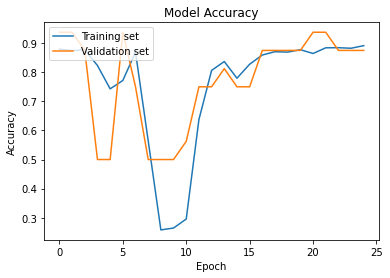

In [39]:
# Accuracy 
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [40]:
history5 = model.fit(
    training_set, 
    steps_per_epoch = 163,
    epochs = 25,
    validation_data = validation_set,
    batch_size = 100,
    class_weight={0:2.8 , 1:1}) # <--------------------------

Epoch 1/25
163/163 [==============================] - 129s 792ms/step - loss: 0.4091 - accuracy: 0.8923 - val_loss: 0.2507 - val_accuracy: 0.8750
Epoch 2/25
163/163 [==============================] - 130s 797ms/step - loss: 0.4538 - accuracy: 0.8890 - val_loss: 0.2498 - val_accuracy: 0.8750
Epoch 3/25
163/163 [==============================] - 129s 792ms/step - loss: 0.4554 - accuracy: 0.8825 - val_loss: 0.2529 - val_accuracy: 0.8750
Epoch 4/25
163/163 [==============================] - 129s 791ms/step - loss: 0.4854 - accuracy: 0.8662 - val_loss: 0.3315 - val_accuracy: 0.7500
Epoch 5/25
163/163 [==============================] - 130s 798ms/step - loss: 0.4696 - accuracy: 0.8842 - val_loss: 0.2867 - val_accuracy: 0.7500
Epoch 6/25
163/163 [==============================] - 129s 793ms/step - loss: 0.4275 - accuracy: 0.8894 - val_loss: 0.2507 - val_accuracy: 0.8750
Epoch 7/25
163/163 [==============================] - 129s 791ms/step - loss: 0.4393 - accuracy: 0.9080 - val_loss: 0.2436 -

In [41]:
history5.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.functional.Functional at 0x123534b0520>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.40906664729118347,
   0.45376670360565186,
   0.45537427067756653,
   0.48544031381607056,
   0.46957331895828247,
   0.4274602234363556,
   0.43932074308395386,
   0.4408319294452667,
   0.43178245425224304,
   0.46007850766181946,
   0.43982812762260437,
   0.41731908917427063,
   0.42750221490859985,
   0.424474835395813,
   0.428537517786026,
   0.39704492688179016,
   1.1216093301773071,
   0.45904460549354553,
   0.44824308156967163,
   0.424085408449173,
   0.4385361075401306,
   0.5336270928382874,
   0.3903825283050537,
   0.40795281529426575,
   0.4015324115753174],
  'accuracy': [0.8922545909881592,
   0.8889954090118408,
   0.8824769854545593,
   0.866180956363678,
   0.8842024803161621,
   0.8893788456916809,
   0.907975435256958,
   0.9085506200790405,
   0.9054831266403198,
   0.8970

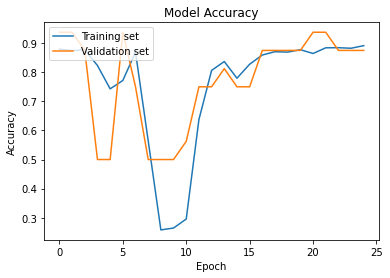

In [42]:
# Accuracy 
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [43]:
history6 = model.fit(
    training_set, 
    steps_per_epoch = 163,
    epochs = 125,
    validation_data = validation_set,
    batch_size = 100,
    class_weight={0:2.8 , 1:1}) # <--------------------------

Epoch 1/125
163/163 [==============================] - 124s 763ms/step - loss: 0.3938 - accuracy: 0.9118 - val_loss: 0.2535 - val_accuracy: 0.9375
Epoch 2/125
163/163 [==============================] - 125s 768ms/step - loss: 0.3983 - accuracy: 0.9107 - val_loss: 0.2585 - val_accuracy: 0.9375
Epoch 3/125
163/163 [==============================] - 125s 770ms/step - loss: 0.3943 - accuracy: 0.9128 - val_loss: 0.2539 - val_accuracy: 0.9375
Epoch 4/125
163/163 [==============================] - 125s 769ms/step - loss: 0.3882 - accuracy: 0.9137 - val_loss: 0.2570 - val_accuracy: 0.8750
Epoch 5/125
163/163 [==============================] - 127s 777ms/step - loss: 0.4150 - accuracy: 0.9080 - val_loss: 0.2537 - val_accuracy: 0.9375
Epoch 6/125
163/163 [==============================] - 127s 780ms/step - loss: 1.6711 - accuracy: 0.7776 - val_loss: 0.3615 - val_accuracy: 0.6250
Epoch 7/125
163/163 [==============================] - 126s 772ms/step - loss: 0.8820 - accuracy: 0.9020 - val_loss: 0

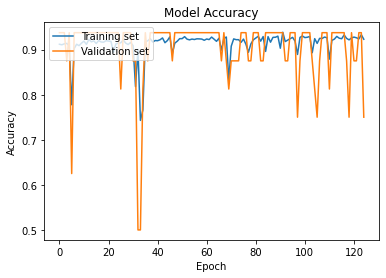

In [44]:
# Accuracy 
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [46]:
test_acc = model.evaluate(test_set, steps=624)
print('The testing accuracy is :', test_acc[1]*100, '%')

1/1 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.8750
The testing accuracy is : 87.5 %


In [47]:
history7 = model.fit(
    training_set, 
    steps_per_epoch = 163,
    epochs = 50,
    validation_data = validation_set,
    batch_size = 50,
    class_weight={0:2.8 , 1:1}) # <--------------------------

Epoch 1/50
163/163 [==============================] - 130s 799ms/step - loss: 0.4160 - accuracy: 0.9258 - val_loss: 0.3095 - val_accuracy: 0.8125
Epoch 2/50
163/163 [==============================] - 127s 778ms/step - loss: 0.4674 - accuracy: 0.9319 - val_loss: 0.3373 - val_accuracy: 0.9375
Epoch 3/50
163/163 [==============================] - 126s 773ms/step - loss: 0.3949 - accuracy: 0.9254 - val_loss: 0.3132 - val_accuracy: 0.8750
Epoch 4/50
163/163 [==============================] - 127s 780ms/step - loss: 0.4080 - accuracy: 0.9314 - val_loss: 0.3118 - val_accuracy: 0.8750
Epoch 5/50
163/163 [==============================] - 126s 774ms/step - loss: 0.3891 - accuracy: 0.9237 - val_loss: 0.3055 - val_accuracy: 0.8750
Epoch 6/50
163/163 [==============================] - 130s 799ms/step - loss: 0.3865 - accuracy: 0.9160 - val_loss: 0.3253 - val_accuracy: 0.7500
Epoch 7/50
163/163 [==============================] - 133s 813ms/step - loss: 0.3471 - accuracy: 0.9300 - val_loss: 0.3167 -

## K-Fold Cross Validation

In [ ]:
# https://stackoverflow.com/questions/56156229/how-to-use-kfold-cross-validation-output-as-cnn-input-for-image-processing

## Conclusion

<!-- https://pubmed.ncbi.nlm.nih.gov/18299488/ -->
<!-- https://pubmed.ncbi.nlm.nih.gov/15759443/ -->

Doctors also make mistakes. This model specifically likely should not be deployed but an improved model will likely be able to outperform human doctors